In [1]:
import sys; sys.path.insert(0,'..')
from hashstash import *
logger.setLevel(logging.INFO)
from hashstash.profilers.engine_profiler import *
import plotnine as p9
import pandas as pd
p9.options.dpi = 300
p9.options.figure_size = (8, 7)

Profiling 168 stashes:   0%|          | 0/168 [00:01<?, ?it/s]


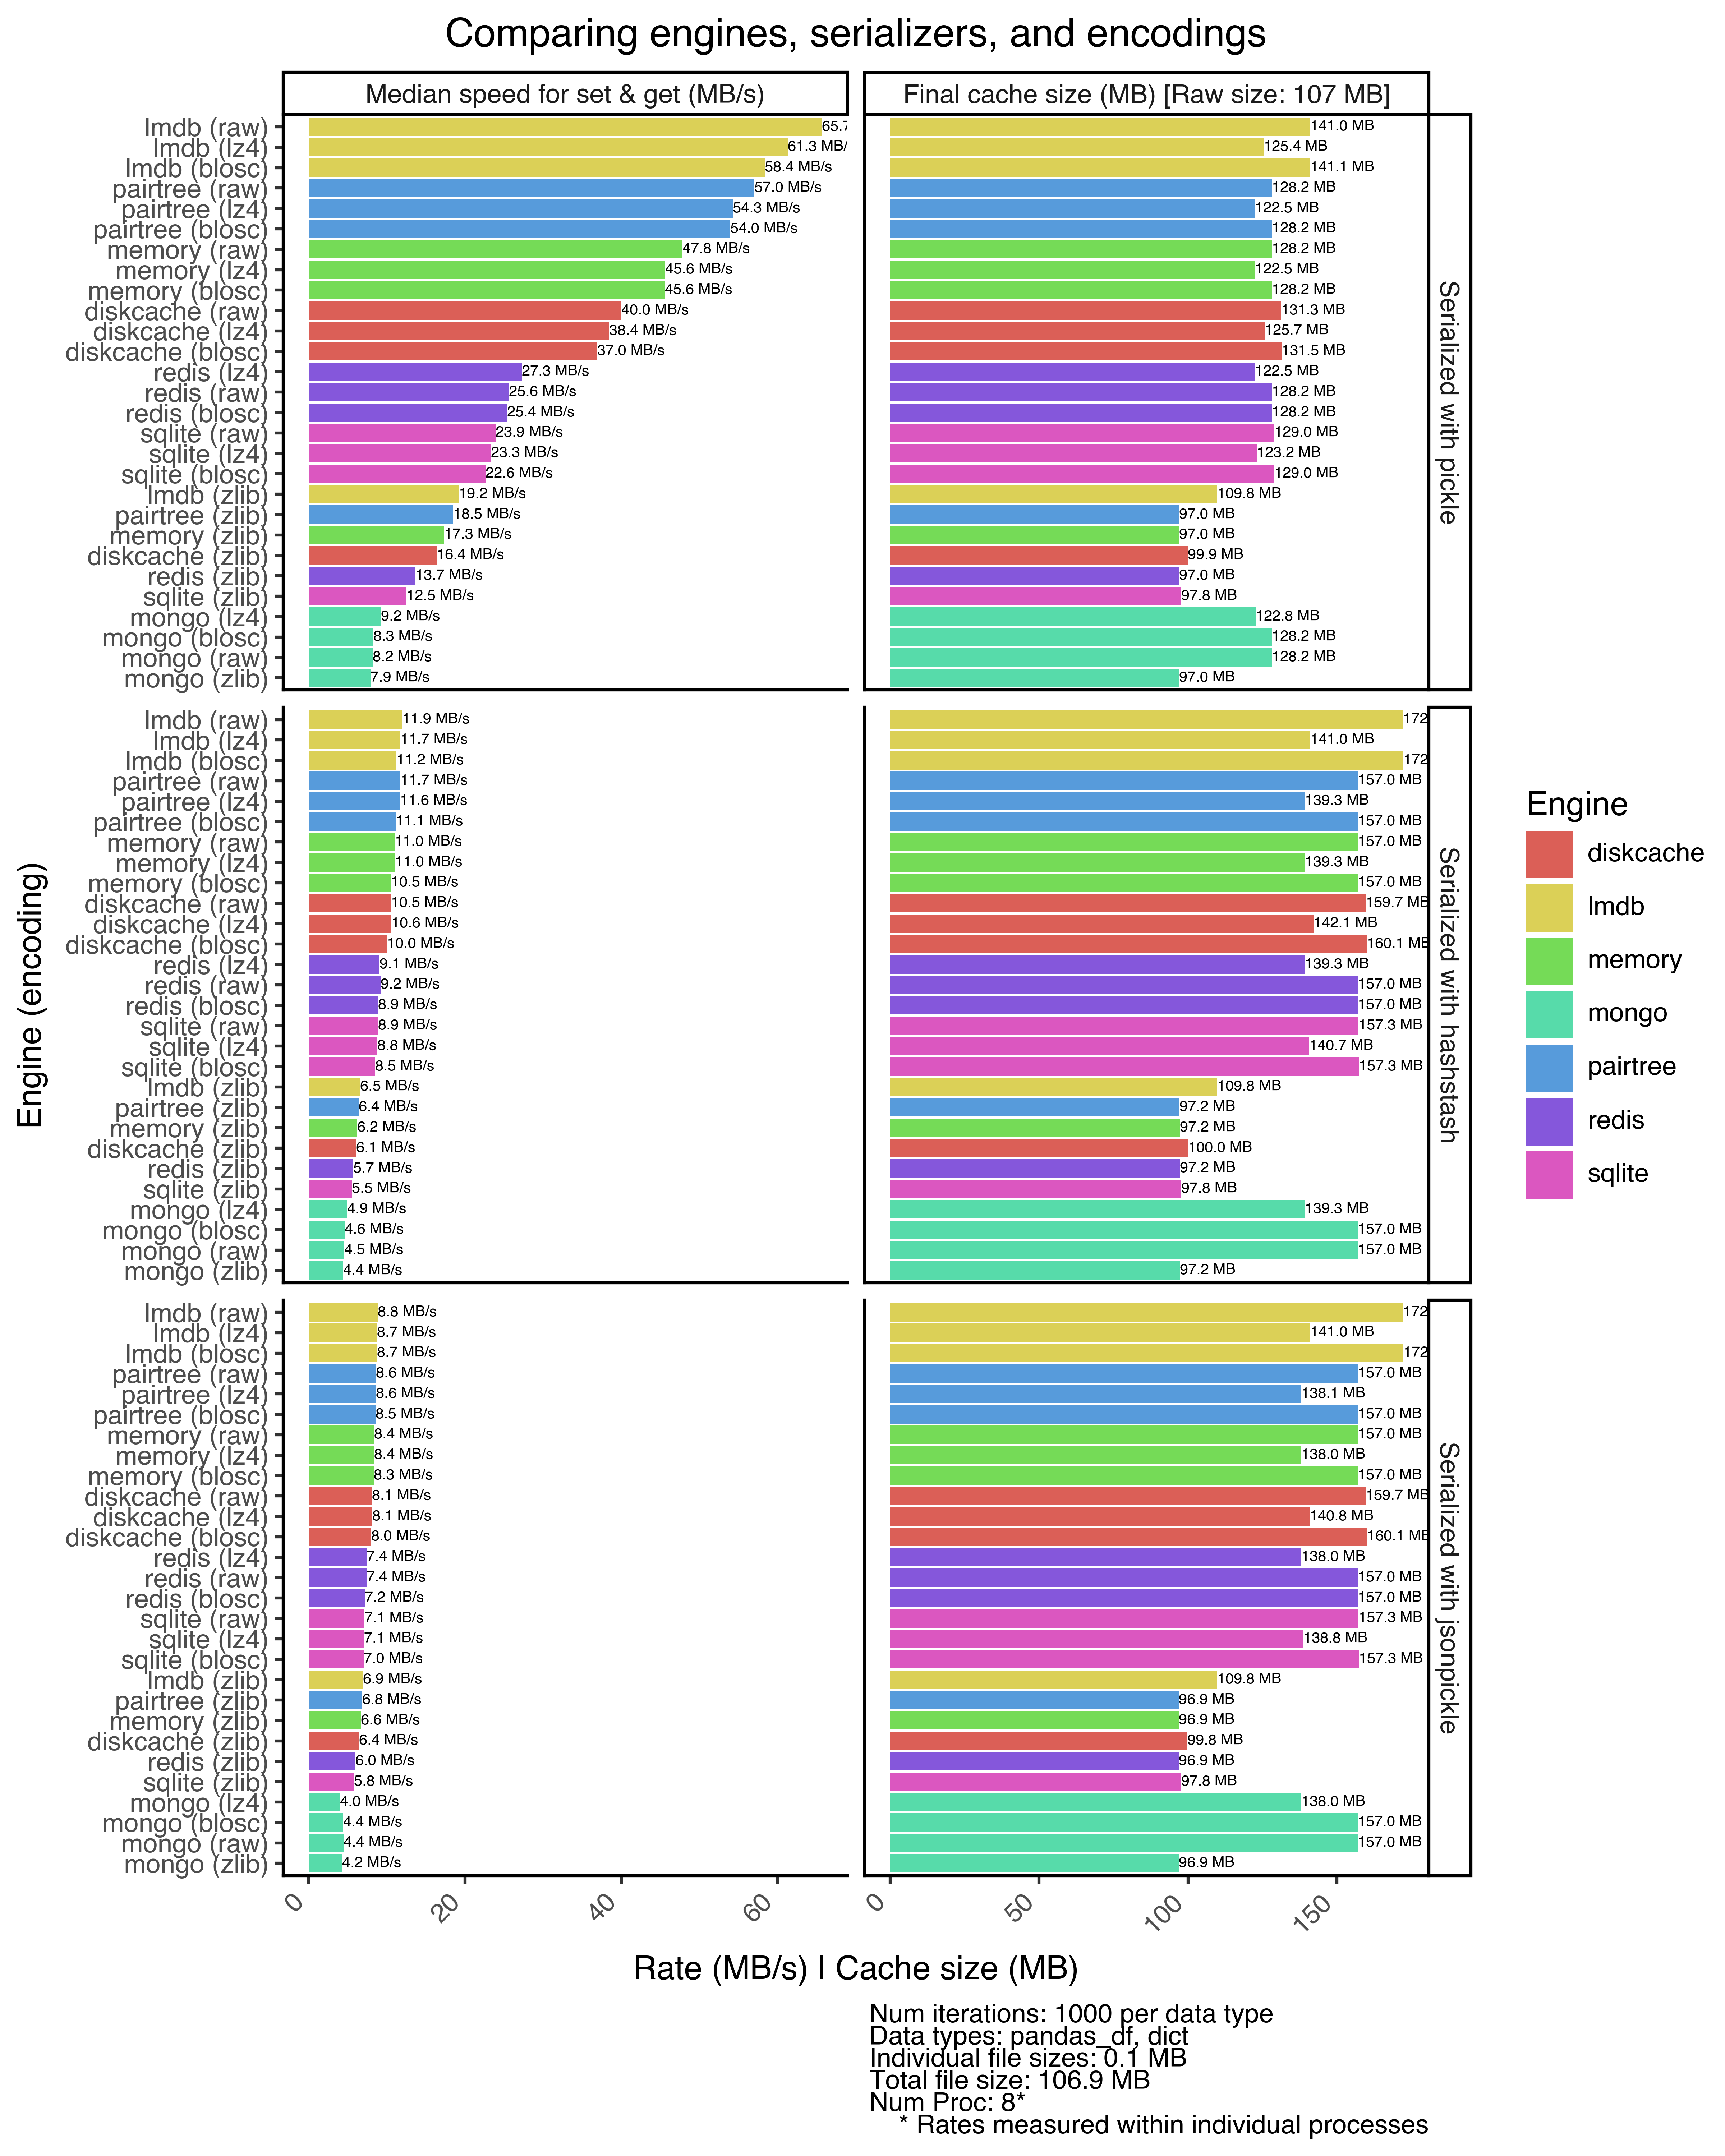

In [2]:
HashStashProfiler.plot_all()